# Gallery 2: Profile Plots
This page provides example on how to plot 3D TUFLOW FV results as a function of depth (a 3D vertical profile). 
This notebook is used in combination with the [TUFLOW FV Python Toolbox](https://tfv.readthedocs.io/en/latest/index.html) (tfv) package. 
To follow along on your own computer, please download the demonstration notebooks from the [TUFLOW Downloads Page](https://www.tuflow.com/downloads/#utilities). Look for the TUFLOW FV Python Toolbox download.
Installation instructions are provided on our [TUFLOW FV Python Toolbox Wiki Page](https://fvwiki.tuflow.com/TUFLOW_FV_Python_Toolbox).

In [1]:
import xarray as xr  # We utilise xarray to do all the heavy lifting 
import numpy as np
import tfv.xarray
from pathlib import Path # We'll also make use of the `pathlib` module to assist with managing file-paths, although this is entirely optional! 
import matplotlib.pyplot as plt

##### Open TUFLOW FV Model Result

In [2]:
model_folder = Path(r'..\..\data')
model_file = 'HYD_002.nc'

fv = xr.open_dataset(model_folder / model_file, decode_times=False).tfv


#### Define Locations for Extraction

In [3]:
locs = {
    'P1' : (159.0758, -31.3638),
    'P2' : (159.0845,  -31.3727),
    'P3' : (159.0906,  -31.3814),
    'P4' : (159.1001,  -31.3948),
    'P5' : (159.1154,  -31.4032),
    'P6' : (159.1266,  -31.4105),
    'P7' : (159.1202,  -31.4165),
    'P8' : (159.1178,  -31.4236),
    'P9' : (159.1277,  -31.4402)
}

loc = 'P1'


#### Extract Profile Data Directly from TUFLOW FV Xarray Accessor Object


In [4]:
prof = fv.get_profile(locs[loc],variables=['V','TEMP','SAL'])
#prof.head() # Uncomment to review the data array 

#### Plot Profile

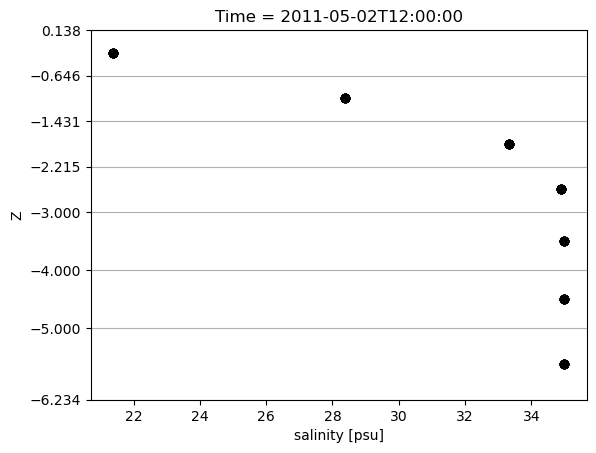

In [5]:
time = '2011-05-02 12:00'
prof.sel(Time=time).plot.scatter(x='SAL',y='Z', color='black', lw=1)

# Show layerfaces
zfaces = prof['layerface_Z'].sel(Time=time)
plt.yticks(zfaces)
plt.grid(axis='y')
plt.show()


This concludes the examples on profile plotting.